## Description:
The goal of this dataset is to determine if a patient has diabetes based on specific diagnostic measurements. It contains several medical predictor variables and one target variable, Outcome. The predictor variables include factors such as the number of pregnancies, BMI, insulin levels, age, and more.

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
df = pd.read_csv("diabetes.csv")

## Data Statistics

In [3]:
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Data Visualization

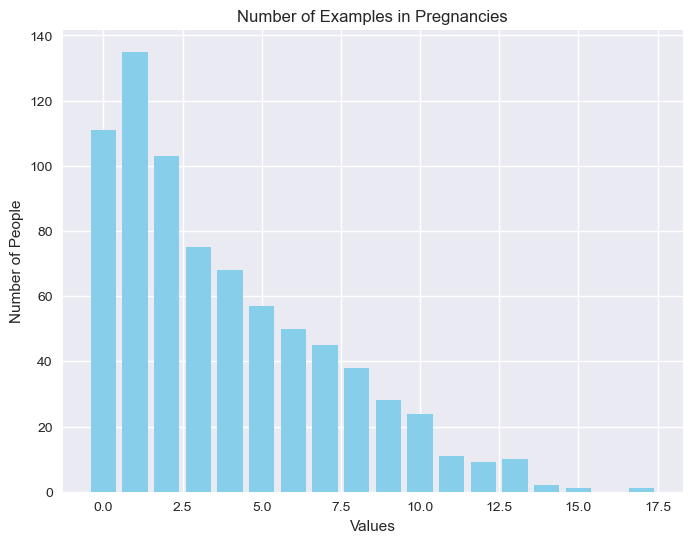

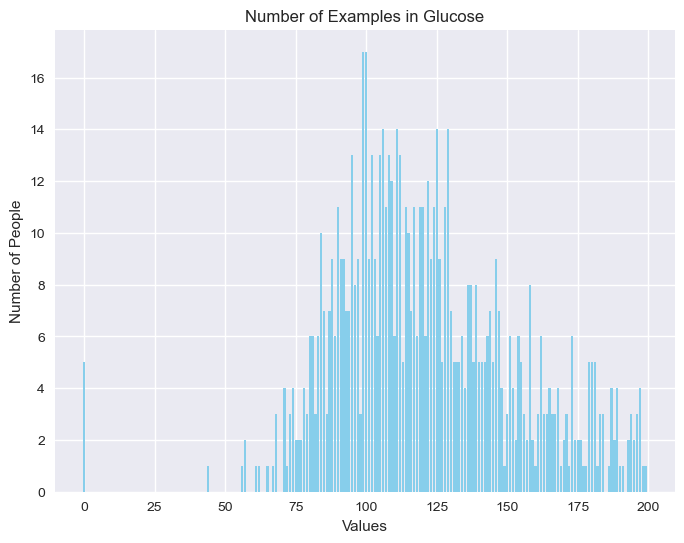

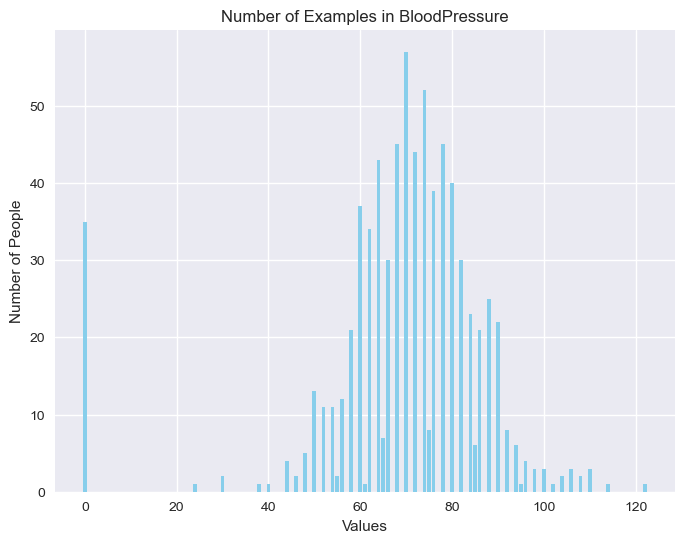

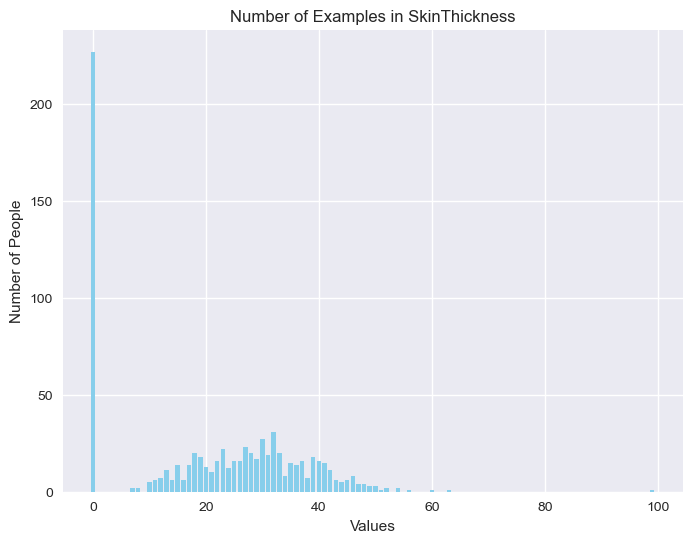

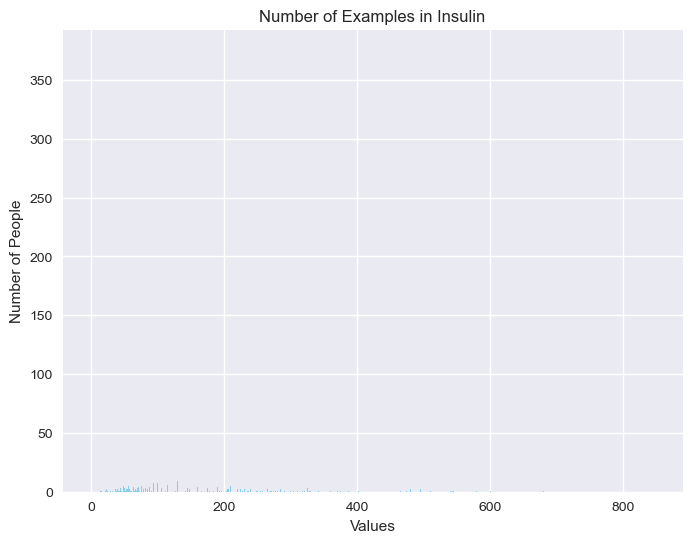

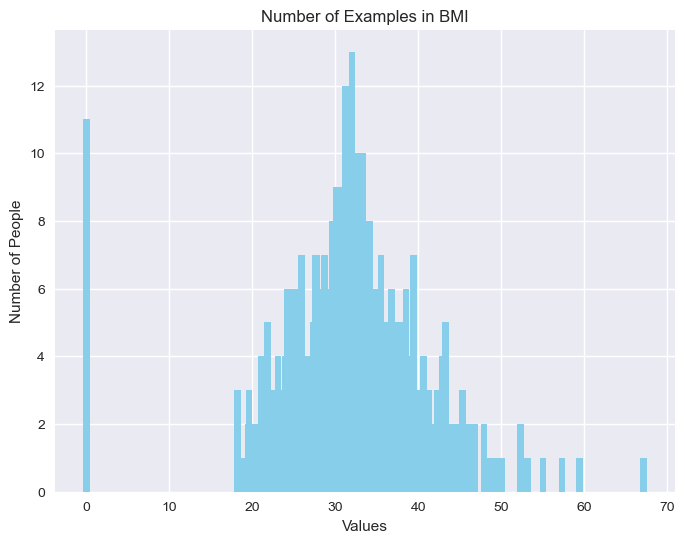

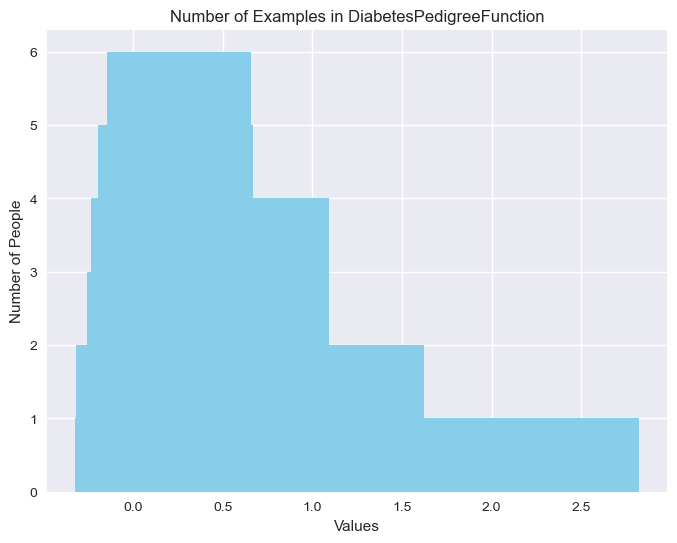

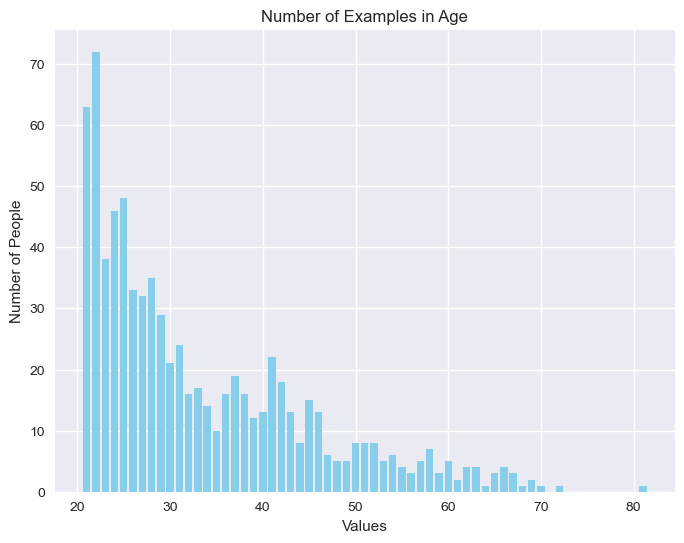

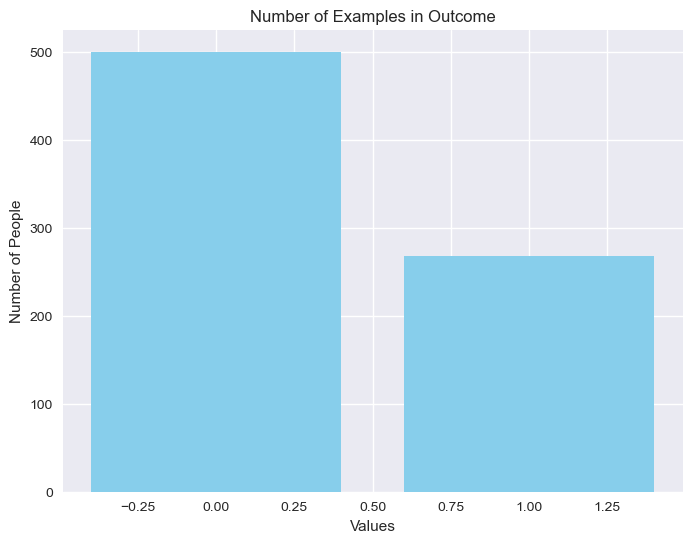

In [6]:
for i in range(df.shape[1]):
    feature_name = df.columns[i]
    class_counts = df.iloc[:, i].value_counts()

    # Plotting the bar graph
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn')
    plt.bar(class_counts.index, class_counts.values, color='skyblue')
    plt.xlabel('Values')
    plt.ylabel('Number of People')
    plt.title(f'Number of Examples in {feature_name}')
    plt.show()


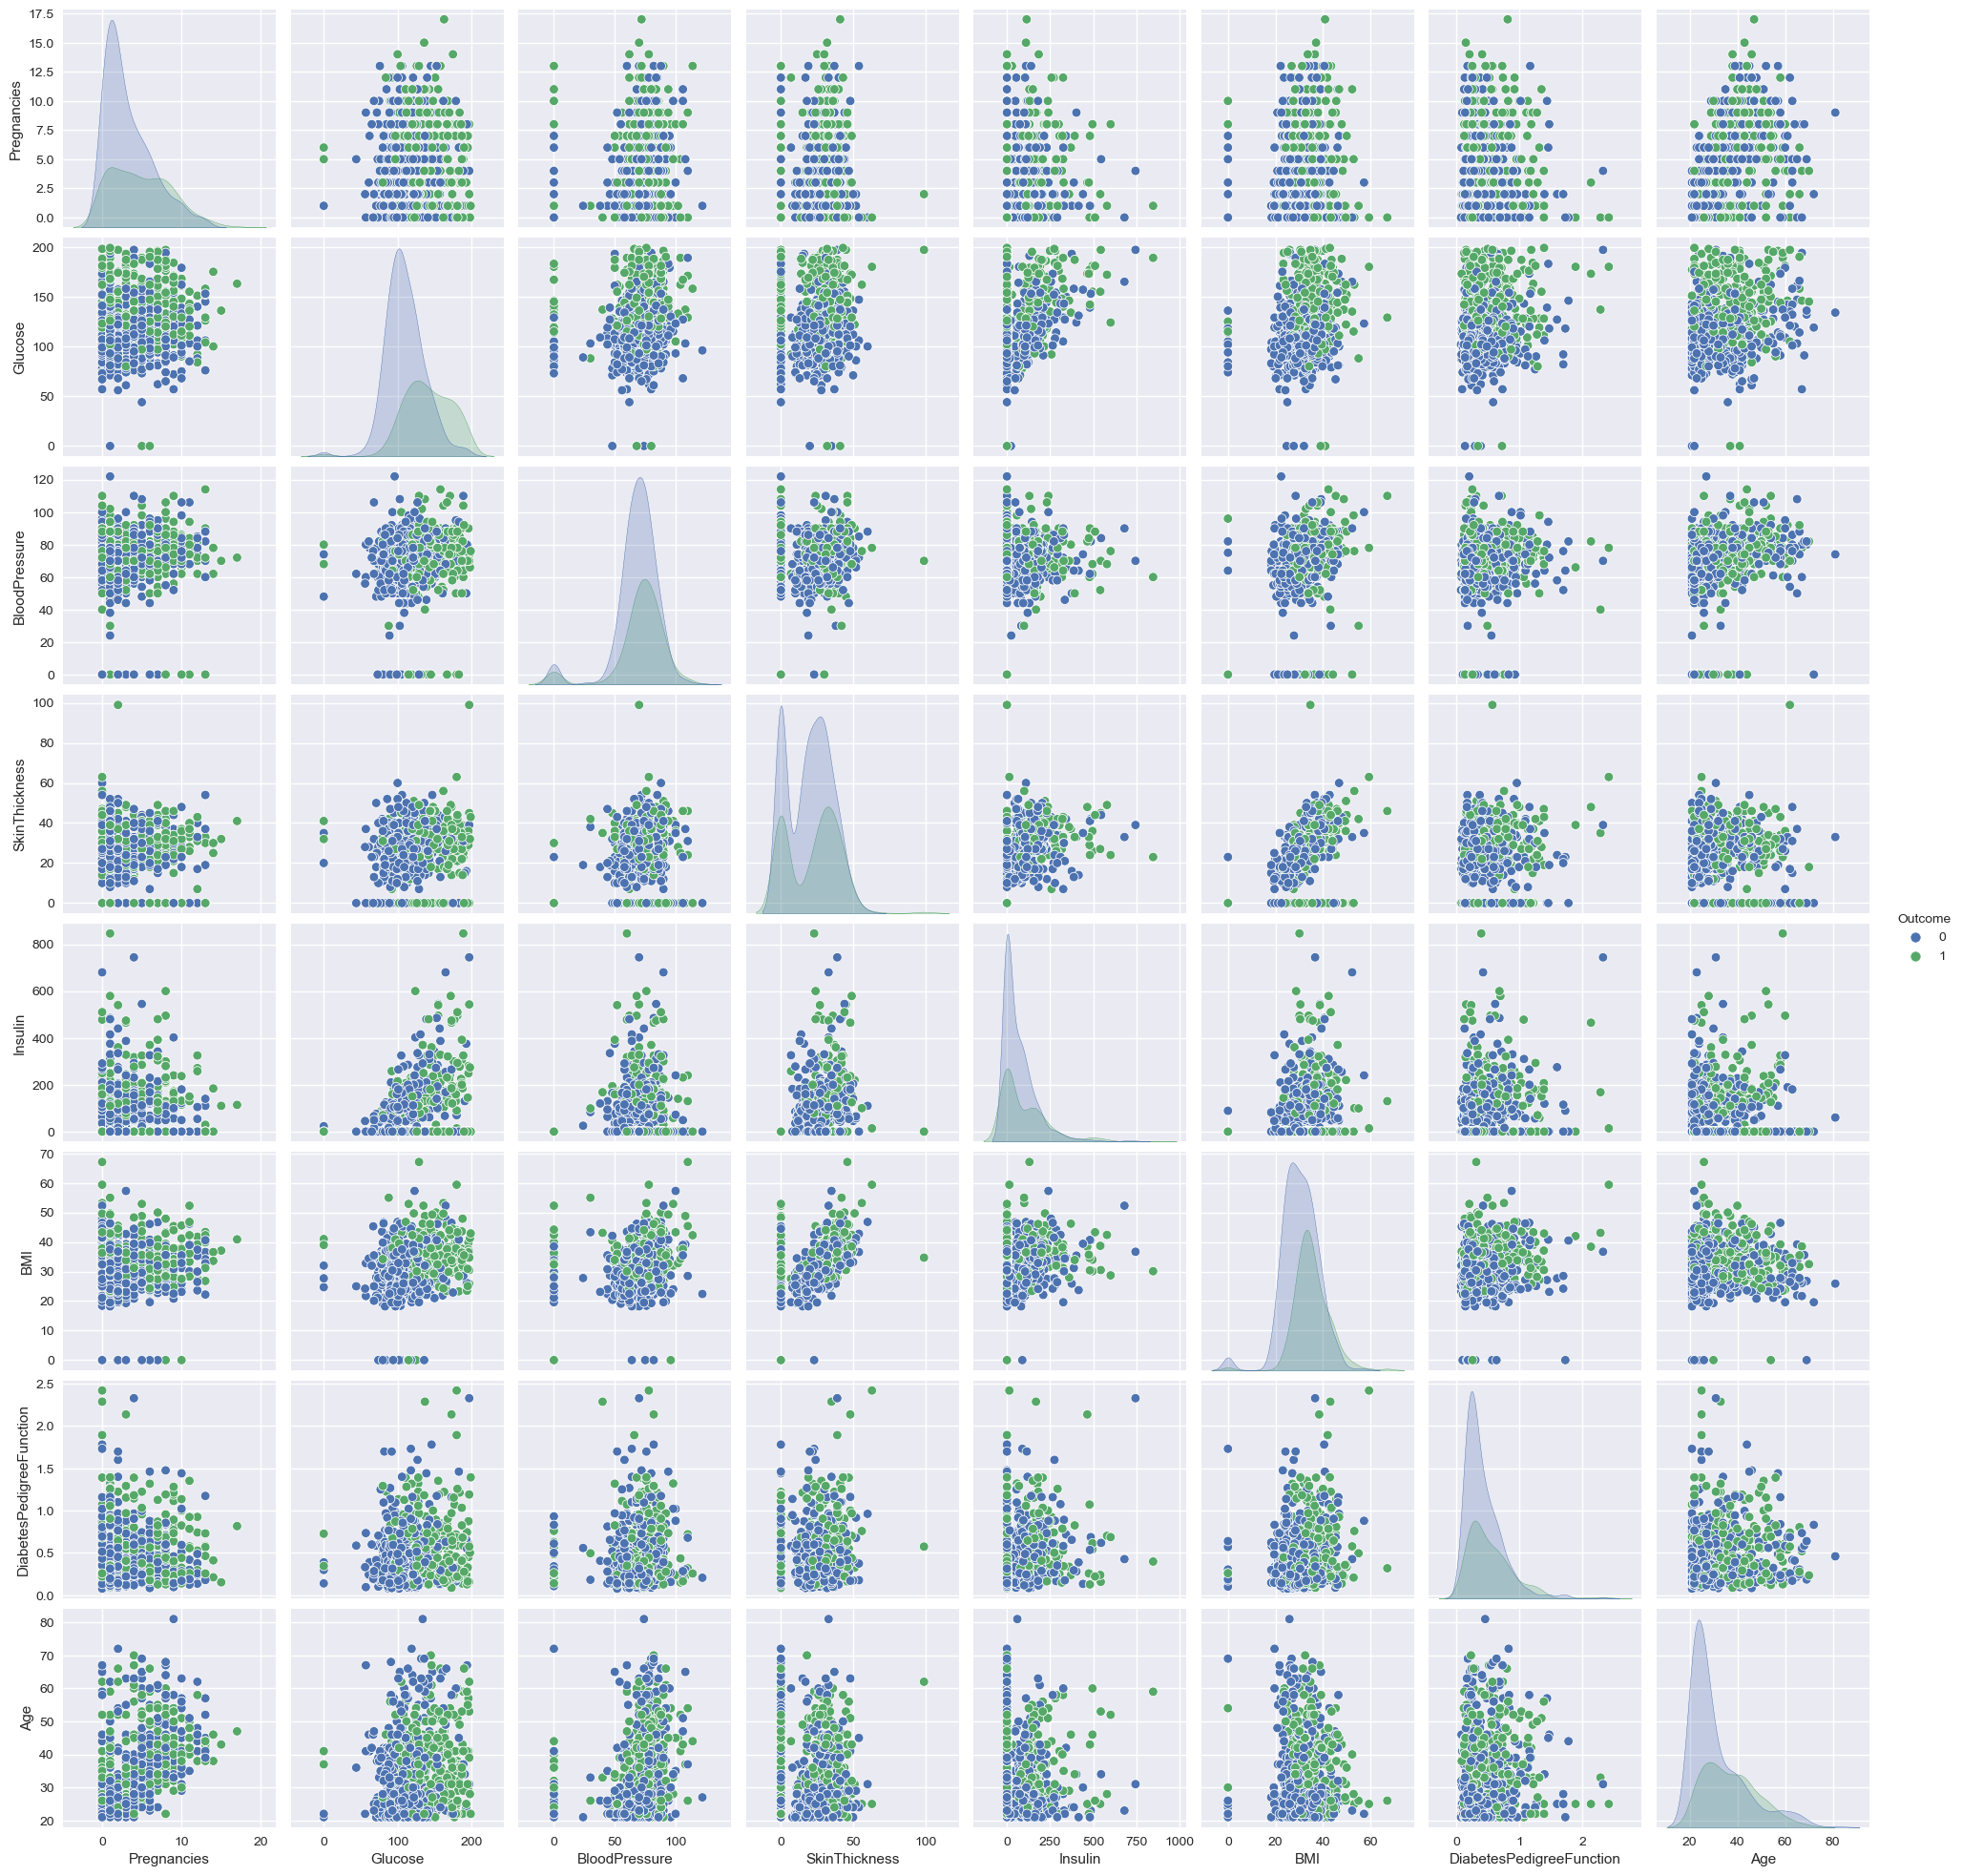

In [7]:
import seaborn as sns

sns.pairplot(df, hue = 'Outcome')
plt.show()


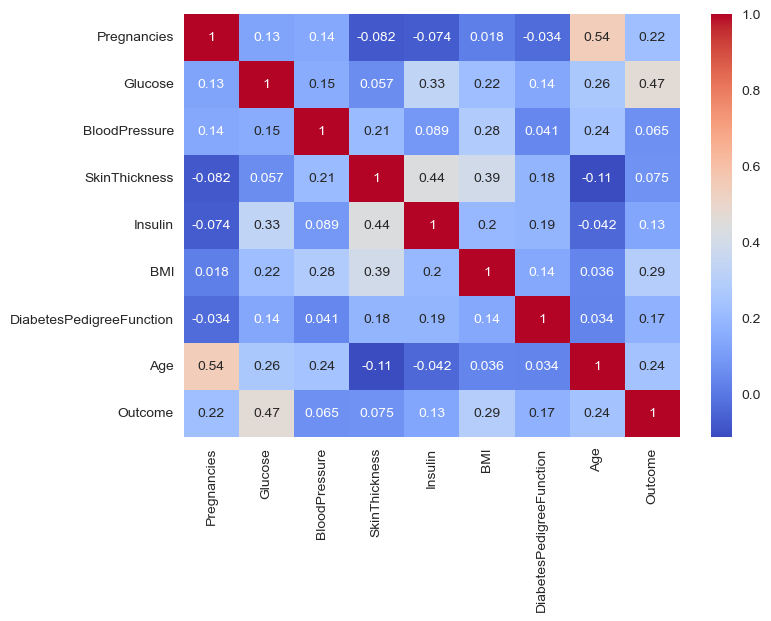

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True,  cmap='coolwarm')
plt.show()


## Data Preprocessing

In [9]:
has_zero = (df== 0).sum()
print("DataFrame has 0 values:", has_zero)

DataFrame has 0 values: Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [10]:
feature = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in feature:
    df[column]= df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column]= df[column].replace(np.NaN,mean)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


## Data Modelling

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

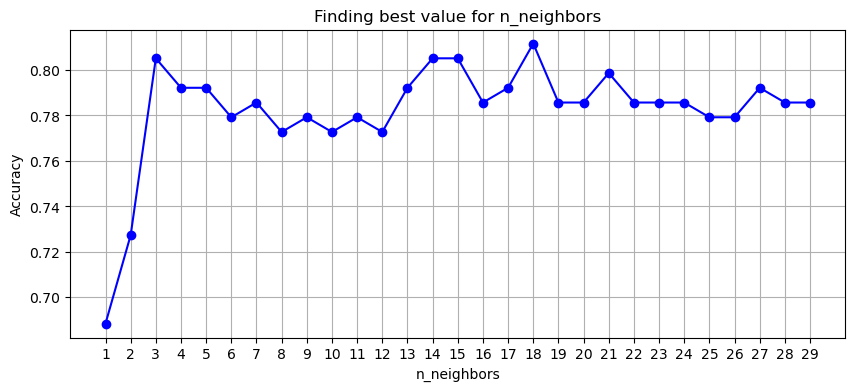

Highest value:  0.8116883116883117


In [16]:
# Finding the best value for K
X_axis = list(range(1, 30))
acc = pd.Series(dtype=float)
x = range(1, 30)

for i in X_axis:
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=i, metric='euclidean', p=2))
    ])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(y_test, prediction)))
    
plt.figure(figsize=(10,4))
plt.style.use('default')

# Plotting the accuracy as a line graph
plt.plot(X_axis, acc, marker='o', linestyle='-', color='b')  # Line graph with markers
plt.xticks(x)
plt.title("Finding best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest value: ', acc.values.max())

In [17]:
pipe = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step2',KNeighborsClassifier(n_neighbors = 18, metric = 'euclidean', p = 2))
])

In [18]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

## Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred)

In [20]:
print("K Nearest neighbors: " + str(accuracy_knn * 100))

K Nearest neighbors: 81.16883116883116


In [21]:
# classification report
from sklearn.metrics import classification_report

print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        99
           1       0.86      0.56      0.68        55

    accuracy                           0.81       154
   macro avg       0.83      0.76      0.77       154
weighted avg       0.82      0.81      0.80       154



In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94  5]
 [24 31]]


<Axes: >

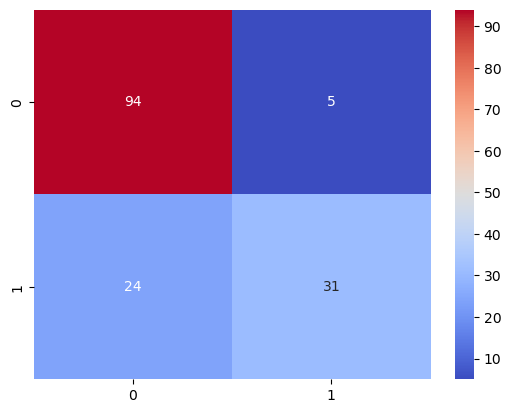

In [23]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='coolwarm')